# Predicting Diabetes
## Import libraries

In [4]:
import pandas as pd  #great libarary for dataframes
import matplotlib.pyplot as plt # matplotlib.pylot is used to pto plot dsta poits
import numpy as np # numpy provides N-dim object support

# do ploting inline instead of in a seperate window
%matplotlib inline

## Load and review data (using pandas dataframes)

In [5]:
df = pd.read_csv("./pima-data.csv") # load the diabetes data

In [59]:
df.shape # check structure of the file ( #rows, #cols )

(768, 10)

In [11]:
df.head(5) # show the first 5 rows

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [12]:
df.tail(3) # show the last 3 raws

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Definition of features

From the metadata on the date source, we are having th e following definitiin of features.

Feature (corresponds to column) | Defintion

0 => Number of pregnancies => num_preg 
1 => Plasma glucose conentration => glucose_conc (mass/vol)
2 => Diastolic blood pressure => disatolic_bp (mm Hg)
3 => Triceps skin fold thinkness => thickness (mm)
4 => 2-hour serum insulin => insulid (mu U/ml)
5 => Body Mass Index (weight in kg/(height in m)^2) = bmi
6 => Diabetes pedigree function => diab-ped
7 => Age => age (years)
8 => skin what the hell
9 => Diabetic (class variable (T/F)) => diabetes

In [14]:
df.isnull().values.any() # check if there is any null values

False

### Function to plot correlation of columns

function plots a graphical correlation matrix for each pair of coumns in the dataframe

Input:
    df: pandas DataFrame
    size: vertical and horizontal size of the plot

Displays:
    matrix of correlation between columns
    dark  ->
    light ->

In [17]:
def plot_corr(df, size=11):
    """
    function plots a graphical correlation matrix for each pair of coumns in the dataframe
    
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    
    Displays:
        matrix of correlation between columns
        yellow  -> very correlated
        dark blue -> not correlated
    """
    corr = df.corr() # pandas dataframe correlation fucntion
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) # color-code the rectangles by correlatin value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks

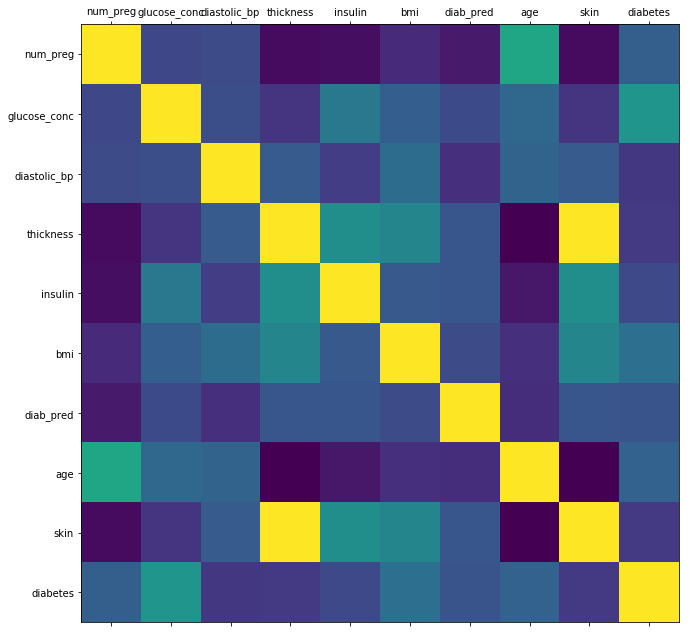

In [18]:
plot_corr(df)

In [19]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [20]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


It is pretty easy to miss something like this. (The correlation between thickness and skin)
Using one column doesnt give us additional information. So delete one.

In [21]:
del df['skin']

In [22]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


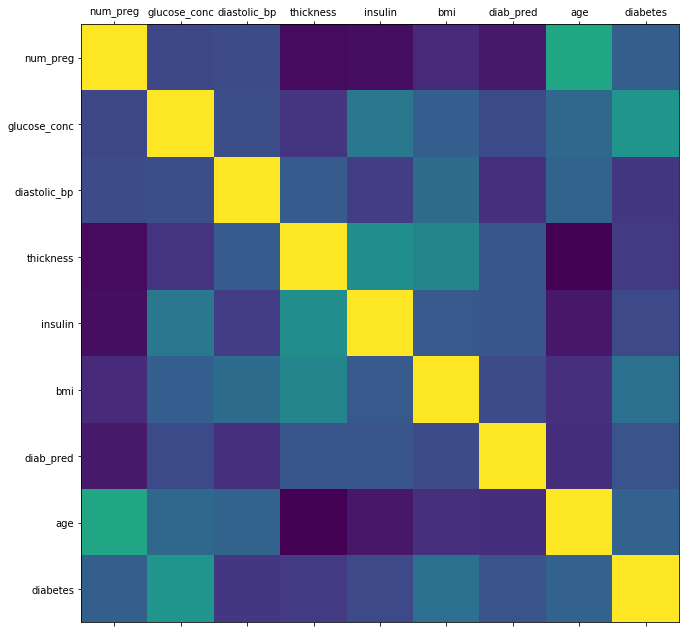

In [24]:
plot_corr(df)

## Check class distribution

In [7]:
total_num = len(df)
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])
print("Number of true cases: {0} ({1:2.2f}%)".format(num_true, (num_true/total_num)*100))
print("Number of false cases: {0} ({1:2.2f}%)".format(num_false, (num_false/total_num)*100))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


Good distribution since it is off 50-50

## Split the data
70% for training, 30% for testing

In [13]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg','glucose_conc', 'diastolic_bp', 'thickness', 'insulin','bmi','diab_pred','age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values # predictor feature columns ( m rows x 8 cols)
y = df[predicted_class_names].values # predicted class columns (m x 1 col) vector
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=41)

Check to ensure we have the desired 70% train, 30% test split over the data

In [14]:
print("{0:2.2f}% in training set.".format((len(X_train)/len(df.index))*100))
print("{0:2.2f}% in test set.".format((len(X_test)/len(df.index))*100))

69.92% in training set.
30.08% in test set.


## Verify pridicted value spit correctly

In [22]:
print("Original true  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index))*100))
print("Original false : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index))*100))

print("\nTraining true : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train))*100))
print("Training false : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train))*100))

print("\nTest true : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test))*100))
print("Test false : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test))*100))

Original true  : 268 (34.90%)
Original false : 500 (65.10%)

Training true : 190 (35.38%)
Training false : 347 (64.62%)

Test true : 78 (33.77%)
Test false : 153 (66.23%)


In [23]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


## Post-split data preparation
### Deal with hidden missing (or null) values

Impute missing values with mean

In [24]:
from sklearn.preprocessing import Imputer
fill_zeroes = Imputer(missing_values=0, strategy='mean', axis=0)
X_train = fill_zeroes.fit_transform(X_train)
X_test = fill_zeroes.fit_transform(X_test)

## Algorithm 1 : Naive Bayes - training

In [25]:
from sklearn.naive_bayes import GaussianNB
# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

## Review thus far
1. Pre-processed the data

2. Used scikit-learn to split the data

3. Used scikit-learn to handle null values

4. Lastly trained the initial Naive Bayes model

## Performance on Training Data

In [27]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

#import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)),'\n')

Accuracy: 0.7635 



## Performance on Testing Data

In [28]:
# predict values using the test data
nb_predict_test = nb_model.predict(X_test)

#import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)),'\n')

Accuracy: 0.7186 



### Performance Metrics

In [34]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1,0])))

Confusion Matrix
[[ 46  32]
 [ 33 120]]


In [35]:
print("Classification report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1,0]))

Classification report
             precision    recall  f1-score   support

          1       0.58      0.59      0.59        78
          0       0.79      0.78      0.79       153

avg / total       0.72      0.72      0.72       231



## Algorithm 2: Random Forest - training

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=41) #create a rondom forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=41, verbose=0, warm_start=False)

### Performance of Training Data

In [37]:
rf_predict_train = rf_model.predict(X_train)
print("Accuracy: {0:0.4}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9814


### Performance on Test Data

In [38]:
rf_predict_test = rf_model.predict(X_test)
print("Accuracy: {0:0.4}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.71


In [39]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1,0])))
print("\nClassification report")
print(metrics.classification_report(y_test, rf_predict_test, labels=[1,0]))

Confusion Matrix
[[ 34  44]
 [ 23 130]]

Classification report
             precision    recall  f1-score   support

          1       0.60      0.44      0.50        78
          0       0.75      0.85      0.80       153

avg / total       0.70      0.71      0.70       231



#### Comment
Classic example of overfitting. The algorithm has learned the data too well.
98 % on train vs 71% on test

## Algorithm 3: Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.7, random_state=41)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

### Performance of Training and Test Data

In [46]:
# training metrics
print("Accuracy on test data: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0]))
print('\nClassification Report')
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))

Accuracy on test data: 0.7576
[[ 41  37]
 [ 19 134]]

Classification Report
             precision    recall  f1-score   support

          1       0.68      0.53      0.59        78
          0       0.78      0.88      0.83       153

avg / total       0.75      0.76      0.75       231



### Adjust regularization parameters for the LR
In an attempt to get better performance
try C element of (0.1 : 5 : 0.1)

1st max value of 0.538 occured at C=1.400


Text(0,0.5,'Recall score')

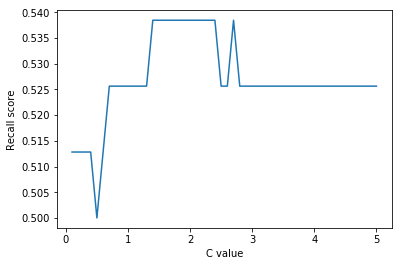

In [48]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=41)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    C_val += C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("Recall score")

#### 0.538 is still unacceptable!

## Logistic Regression with balanced weight class

1st max value of 0.731 occured at C=0.700


Text(0,0.5,'Recall score')

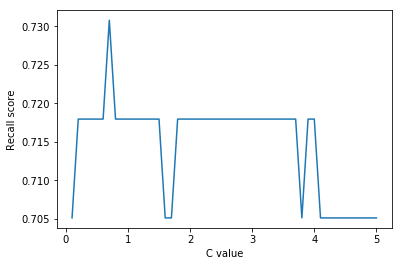

In [54]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    C_val += C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("Recall score")

### Note
We made 2 adjastment for best results:
1. Added the best score c value then
2. We added a balanced weight class
Here is the function that changed:

lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=41)

### Current Performance

In [55]:
# training metrics
print("Accuracy on test data: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0]))
print('\nClassification Report')
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy on test data: 0.7576
[[ 41  37]
 [ 19 134]]

Classification Report
             precision    recall  f1-score   support

          1       0.68      0.53      0.59        78
          0       0.78      0.88      0.83       153

avg / total       0.75      0.76      0.75       231

0.5256410256410257


## Logistic Regression with Cross Validation
LogisticRegressionCV does this easily with scikitlearn
### Model and Learn

In [56]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=1, random_state=41, Cs=3, cv=10, refit=True, class_weight="balanced")
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=41,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

### Predict on test data

In [58]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy of LR with CV: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1,0]))
print("\nClassification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy of LR with CV: 0.7273
[[ 52  26]
 [ 37 116]]

Classification Report
             precision    recall  f1-score   support

          1       0.58      0.67      0.62        78
          0       0.82      0.76      0.79       153

avg / total       0.74      0.73      0.73       231



### Choose maikhethela: CV or no CV

Genius is one percent inspiration and ninety-nine percent perspiration.